### Assume a linear regression model with normal errors. Take sigma to be known. Show that the model with the highest AIC is the model with the lowest Mallow's Cp statistic.


In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score 

C:\Users\khann\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-87.64243576 -88.31035187 -89.28735993 -90.28716205 -90.55378738
 -89.97657142 -88.8239806  -87.66976131 -88.62016958 -89.25828508]
0


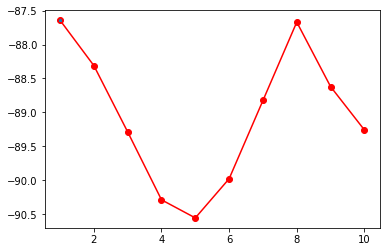

In [2]:
b0=1
b1=0.3
sigma=0.5
np.random.seed(123)
x=np.array(np.linspace(1,5,100))
n=len(x)
y=b0+b1*x+np.random.normal(0,sigma,n)
deg=10
Aic=np.array(np.zeros((deg)))

s1=np.array(np.zeros((deg)))
for d in range(1,11):
    s1[d-1]=d+1+1
s=np.asarray(s1)    
print(s)    
print(Aic)
s2=np.array(np.zeros((deg)))
for degree in range(1,11):
        coefs = poly.polyfit(x, y, degree)
        ffit = poly.polyval(x, coefs)
        residual=y-ffit
        sigma_hat=np.sum((residual)**2)/n
        likelihood=np.prod((1/(np.sqrt(2*np.pi)*np.sqrt(sigma_hat)))*np.exp(-(1/(2*(sigma_hat)))*(y-ffit)**2))
        s2[degree-1]=np.log(likelihood)

Aic=s2-s 
print(Aic)
d=np.linspace(1,10,10)

max(Aic)
a=np.argmax(Aic)
print(a)
plt.plot(d,Aic,'ro-')
plt.plot(d[a],Aic[a],marker="*",markersize=3,markerfacecolor='g')

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


0


array([0.20335305, 0.2711374 , 0.33892175, 0.4067061 , 0.47449046,
       0.54227481, 0.61005916, 0.67784351, 0.74562786, 0.81341221])

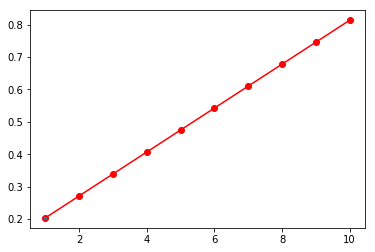

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
b0=1
b1=0.3
sigma=0.5
np.random.seed(123)
x=np.array(np.linspace(1,5,100))
n=len(x)
y=b0+b1*x+np.random.normal(0,sigma,n)
d={'y':y,'x':x}
data=pd.DataFrame(d)
deg=10
s1=np.array(np.zeros((deg)))
for d in range(1,11):
    s1[d-1]=d+1+1
s=np.asarray(s1)    
print(s)  
rep=range(1,100)
train_mse=np.zeros((n,deg))
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.3)
    for deg in range(1, 11):
        # Training Polynomial Regression Model
        x_tr = PolynomialFeatures(degree=deg,include_bias=False).fit_transform(train_data.x.reshape(-1,1))
        x_ts = PolynomialFeatures(degree=deg,include_bias=False).fit_transform(test_data.x.reshape(-1,1))
        model = LinearRegression(fit_intercept=True).fit(x_tr,train_data.y)
        # Predict Result with Polynomial Regression
        tr_pred= model.predict(x_tr)
        ts_pred=model.predict(x_ts)
        train_mse[i-1,deg-1]=np.sum(tr_pred-train_data.y)**2

avg_tr_ms=train_mse.mean(0)
residual=train_data.y-tr_pred
sigma_hat=np.sum((residual)**2)/n
Cp=avg_tr_ms+2*s*(sigma_hat**2)
b=np.argmin(Cp)
print(b)
d=np.linspace(1,10,10)
plt.plot(d,Cp,'ro-')
plt.plot(d[b],Cp[b],marker="*",markersize=3,markerfacecolor='g')
Cp

### this shows that the model with highest AIC is the model with smallest Mallow's Cp statistcs